In [2]:
# import class MergerRemnant
import Remnant
from Remnant import *

import MassProfile
from MassProfile import *

# import all modules needed 
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Find Half Mass Radius

In [3]:
# Find Half mass radius with snapshot 579
Rm = MassProfile("Remnant", 579)
rr = np.arange(0, 50, 1)
mass = Rm.MassEnclosed(2, rr)

ind = np.where(mass < (mass[-1]/2))
rhalf = rr[ind][-1]
print("Half mass radius calculated with 579 snapshot is (kpc): ", rhalf)

Half mass radius calculated with 579 snapshot is (kpc):  9


## Find V_max 

In [4]:
MW_M31 = MergerRemnant("MW","M31", 579)
MW_M31.RotateAxis()
r2, v2, rho, vphi = MW_M31.V_Phi()

ind = np.where((r2>=30) & (r2<= 50))
v_max = np.mean(v2[ind])

print(f"V_max is : {v_max}")

V_max is : 128.56744768396825


In [5]:
# make array of snapshot numbers 0-10 Gyrs by step 2 Gyrs
t = np.linspace(0, 10, 30)
snaps = t * 0.7 /10 * 1000
snapnumbers = snaps.round().astype(int)

voversigma = np.zeros((np.size(snapnumbers), 50) )


for i in range(0, len(snapnumbers), 1):
    
    # create remnant text file and object 
    MW_M31 = MergerRemnant("MW","M31", snapnumbers[i])

    # roatate axis such that major rotational axis match with z axis 
    MW_M31.RotateAxis()

    # show edge on view as 2D histogram
    # MW_M31.EdgeOnVIew()
    
    # calculate circular velocity 
    rr, Vcirc = MW_M31.V_circ()

    # calculate v_phi 
    r2, v2, rho, vphi = MW_M31.V_Phi()
        
    # make rotation curve 
    # RotationCurve(rho, rr, Vcirc, r2, v2, snapnumbers[i])
    
    # calculate v_max/sigma
    voversigma[i, :] = MW_M31.Vmax_over_sigma(v_max, rhalf)
    print("Time: ", i)
    
    
print('V/sigma: ',  voversigma[i, rhalf])

/Users/suzukihina/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/suzukihina/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/suzukihina/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/suzukihina/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/suzukihina/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time:  0


/Users/suzukihina/Desktop/spring2025/astr400b-25s/ra/Remnant.py:239: RuntimeWarning: divide by zero encountered in divide
  return v_max / sigma


Time:  1
Time:  2
Time:  3
Time:  4
Time:  5
Time:  6
Time:  7
Time:  8
Time:  9
Time:  10
Time:  11
Time:  12
Time:  13
Time:  14
Time:  15
Time:  16
Time:  17
Time:  18
Time:  19
Time:  20
Time:  21
Time:  22
Time:  23
Time:  24
Time:  25
Time:  26
Time:  27
Time:  28
Time:  29
V/sigma:  0.06901611048310766


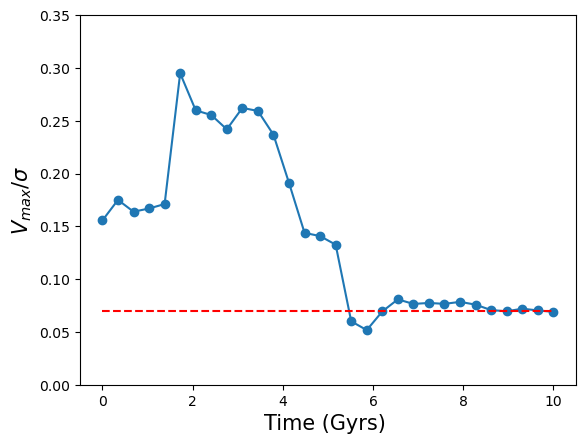

In [6]:

plt.plot(t, voversigma[:, rhalf], '-o')
plt.xlabel("Time (Gyrs) ", fontsize=15)
plt.ylabel(r'$V_{max}/ \sigma$', fontsize=15)

plt.hlines(y=0.07, xmin=0,xmax=10, color="red", linestyle="--")
# plt.hlines(y=0.6, xmin=0,xmax=10, color="red", linestyle="--")
plt.ylim(0,0.35)

plt.savefig("plot/V_sigma.pdf")